### **Important Packages used here**

In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install torch # for pytorch
# !pip install torchvision
# !pip install opencv-python # for cv2
# !pip install scikit-learn # for sklearn
# !pip install tqdm # for loading bar
# !pip install plotly # for visualisation
# !pip install matplotlib
# !pip install ipympl # for matplotlib_inline


### **Import and Preprocess**

#### **Import Libraries**

In [ ]:
# urllib.request is used for opening and reading URLs
import urllib.request

# pandas is a powerful data manipulation library
import pandas as pd

# numpy is used for mathematical operations
import numpy as np

# os provides functions for interacting with the operating system
import os

# cv2 is OpenCV library used for image processing
import cv2

# torch is a library for processing tensors
import torch

# nn is a module of PyTorch that provides classes for building neural networks
import torch.nn as nn

# functional is a PyTorch module for functions like activation functions, etc.
import torch.nn.functional as F

# DataLoader and TensorDataset are utility classes to handle data in PyTorch
from torch.utils.data import DataLoader, TensorDataset

# copy provides functions for shallow and deep copy operations
import copy

# random provides functions for generating random numbers
import random

# sklearn.metrics contains score functions, performance metrics and pairwise metrics
import sklearn.metrics as skm

# train_test_split is used to split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

# SVC, KNeighborsClassifier, and RandomForestClassifier are various machine learning algorithms
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# accuracy_score function computes the accuracy
from sklearn.metrics import accuracy_score

# torchvision is a package consists of popular datasets, model architectures, and common image transformations for computer vision
import torchvision

# time is a module for time-related functions
import time

# tqdm is used for progress bar
from tqdm.notebook import tqdm

# plotly.subplots, plotly.graph_objs and plotly.subplots are used for creating interactive plots
import plotly.subplots as sp
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# matplotlib.pyplot is used for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt

# matplotlib_inline.backend_inline is used to set the inline backend for Jupyter notebook
from matplotlib_inline.backend_inline import set_matplotlib_formats

# set_matplotlib_formats function is used to control the format of the plot
set_matplotlib_formats('svg')


In [ ]:
# Defining device to use (GPU or CPU)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#### **Import and Explore Dataset**

In [ ]:
# Download train and test dataset
urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', 'optdigits_train.txt')
urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes', 'optdigits_test.txt')

('optdigits_test.txt', <http.client.HTTPMessage at 0x7fb556db3a60>)

In [ ]:
# Load train and test data
train_data = np.loadtxt('optdigits_train.txt', delimiter=',')
test_data = np.loadtxt('optdigits_test.txt', delimiter=',')

# Check shape
print(train_data.shape)
print(test_data.shape)

(3823, 65)
(1797, 65)


The train and test sets were combined to allow for re-splitting into Train (80%), Validation (10%), and Test (10%) sets.  

In [ ]:
# Combine train and test data
dataset = np.vstack((train_data, test_data))

# Save cobined data as .csv
pd.DataFrame(dataset).to_csv('optdigits_all.csv', index=False, header=False)

# Inspect the shape of the data
dataset.shape

(5620, 65)

The data was split into data(features) and labels(the classes)

In [ ]:
# Separating the new_data into data(image features) and labels(classes)

data = dataset[:, :-1]
labels = dataset[:, -1]

# print the shape of data
print(data.shape)

# print the shape of label
print(labels.shape)

(5620, 64)
(5620,)


Inspection of the number of samples per class for each of the class of the dataset

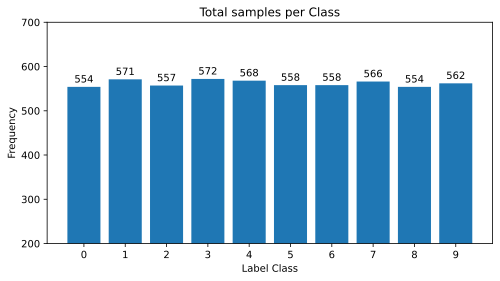

In [ ]:
## Show the barchart of the classes

# Calculate the count of each label class
unique_labels, counts = np.unique(labels, return_counts=True)
label_counts = dict(zip(unique_labels, counts))

# Plot the histogram
fig1, ax1 = plt.subplots(figsize=(8, 4))
ax1.bar(label_counts.keys(), label_counts.values())
ax1.set_xlabel('Label Class')
ax1.set_ylabel('Frequency')
ax1.set_title('Total samples per Class')
ax1.set_xticks(unique_labels)
ax1.set_ylim(200, 700)

# Add frequency text above each bar
for i, count in enumerate(label_counts.values()):
    plt.text(i, count + 10, str(count), ha='center')

plt.show()


From the bar charts, it can be observed that the classes are equally represented with just slight variations

#### **Normalize the Data**

Before normalising, the ranges of values of the data needs to be first inspected

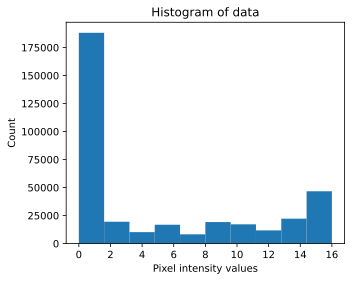

In [ ]:
# display histogram of pixel values
fig1, ax1 = plt.subplots(figsize=(5,4))
ax1.hist(data.flatten(), 10)
ax1.set_xlabel('Pixel intensity values')
ax1.set_ylabel('Count')
ax1.set_title('Histogram of data')
# ax1.set_yscale('log')
plt.show()

The data range is observed to be from 0 to 16, necessitating normalization to a range of 0 to 1 to enhance the overall training performance of the models.  

Min-max scaling was used for normalization, which involves subtracting the minimum pixel value and dividing by the maximum value.  

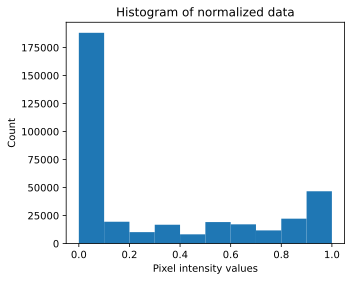

In [ ]:
# Normalize the pixel values to a range of 0 - 1
dataNorm = data / np.max(data)

# Show histogram of normalized data
fig2, ax2 = plt.subplots(figsize=(5,4))
ax2.hist(dataNorm.flatten(), 10)
ax2.set_xlabel('Pixel intensity values')
ax2.set_ylabel('Count')
ax2.set_title('Histogram of normalized data')
# ax2.set_yscale('log')
plt.show()

Vissulising some of the data to see what the data actually looks like

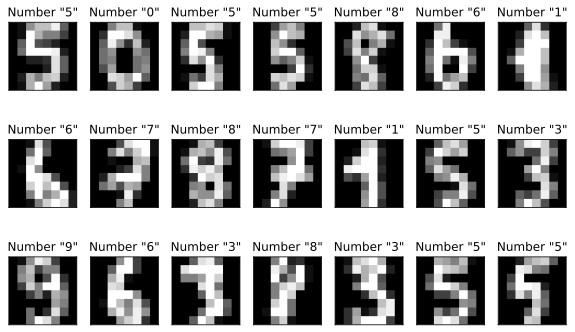

In [ ]:
# visualize some images
fig,axs = plt.subplots(3,7,figsize=(10,6))

for i,ax in enumerate(axs.flatten()):

  # pick a random pic
  whichpic = np.random.randint(data.shape[0])

  # extract the image and its target letter
  Img = np.reshape( dataNorm[whichpic,:], (8,8) )
  label = int(labels[whichpic])

  # visualize
  ax.imshow(Img,cmap='gray')
  ax.set_title('Number "%s"'%label)
  ax.set_xticks([])
  ax.set_yticks([])

plt.show()

So this problem is a classification task which basically involves training a model to be able to correctly classify the digits

## **Artificial Intelligence Approach**

The artificial intelligence methods applied in order to solve this problem are:
- Feed Forward Network (FFN)
- Random Forest
- Support Vector Machine (SVM)
- K-Nearest Neighbour (KNN)
- Convolution Neural Network (CNN)

### **Feed Forward Network (FFN)**

#### Splitting the Dataset and Creating a Dataloader Object

**Discussion of Code**  

- The data is first converted into a tensor since PyTorch is being used.  
- The data is then split into Train (80%), Validation (10%), and Test (10%) sets. As scikit-learn does not provide a function to perform this split automatically, the following approach was used:  
  - The dataset was initially split into a Train set (80%) and a temporary Test set (20%).  
  - The temporary Test set was further split into Validation (10%) and Test (10%) sets.  
  - This approach ensures that the Train and Validation sets are used for model training and development, while the reserved Test set is used for evaluating the final model.  
- A random state was specified to ensure consistent splits across all models.  
- The resulting splits were then converted into a PyTorch dataset and passed into a DataLoader for further processing.  

In [ ]:
## Step 1: Tensor transformation
# Transforms normalized data into a float tensor
dataT   = torch.tensor( dataNorm ).float()
# Transforms labels into a long tensor (equivalent to int64)
labelsT = torch.tensor( labels ).long()

## Step 2: Partitioning of data
# Splits the dataset into training and temporary test sets, with an 80:20 ratio
train_data,testTMP_data, train_labels,testTMP_labels = train_test_split(dataT, labelsT, test_size=.2, shuffle = True, random_state = 100)

## Step 3: Further division of data
# Further splits the temporary test set into validation and test sets, each accounting for 50% of the original test set
val_data,test_data, val_labels,test_labels = train_test_split(testTMP_data, testTMP_labels, test_size=.5, shuffle = True, random_state = 100)

## Step 4: Conversion to PyTorch Datasets
# Converts the training, validation, and test sets into PyTorch TensorDataset format
train_data = TensorDataset(train_data, train_labels)
val_data = TensorDataset(val_data, val_labels)
test_data  = TensorDataset(test_data, test_labels)

## Step 5: Creation of DataLoader objects
# Defines the batch size and creates DataLoader objects for the training, validation, and test sets
batchsize    = 32
train_loaderFFN = DataLoader(train_data, batch_size = batchsize, shuffle=True, drop_last=True)
val_loaderFFN = DataLoader(val_data, batch_size = val_data.tensors[0].shape[0])
test_loaderFFN  = DataLoader(test_data, batch_size = test_data.tensors[0].shape[0])


In [ ]:
# Inpection of the sizes of the outputs from above to ensure everything is intact
print( train_loaderFFN.dataset.tensors[0].shape )
print( val_loaderFFN.dataset.tensors[0].shape )
print( test_loaderFFN.dataset.tensors[0].shape )

print(' ')

print( train_loaderFFN.dataset.tensors[1].shape )
print( val_loaderFFN.dataset.tensors[1].shape )
print( test_loaderFFN.dataset.tensors[1].shape )

torch.Size([4496, 64])
torch.Size([562, 64])
torch.Size([562, 64])
 
torch.Size([4496])
torch.Size([562])
torch.Size([562])


#### **The FFN model**

The FFN model is defined to perform classification after training.  

##### Creating the FFN0 model

In [ ]:
# Set a random seed for PyTorch and NumPy
torch.manual_seed(9)
np.random.seed(9)

# creating a class for the model
def TheFFN0net():

  class FFNnet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(64,40)

      ### hidden layer
      self.fc1 = nn.Linear(40,70)
      self.fc2 = nn.Linear(70,20)

      ### output layer
      self.output = nn.Linear(20,10)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      # x = F.dropout(x, p=.2, training = self.training)                 ## dropout
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return self.output(x)

  # create the model instance
  net = FFNnet()

  # specify the loss function
  lossfun = nn.CrossEntropyLoss() # crossEntropy because its a classification task

  # optimizer
  optimizer = torch.optim.AdamW(net.parameters(),lr=.001) # AdamW is the current state of the art optimiser

  # Here we return the results from this model
  return net,lossfun,optimizer

In [ ]:
# Here we check do a sanity check to be sure everything is set up properly
net,lossfun,optimizer = TheFFN0net()

# Pick the next batch from the train and
X,y = next(iter(train_loaderFFN))
yHat = net(X)

# Calculate the loss to see if everything is intact
loss = lossfun(yHat,y)
print(' ')
print('Loss:')
print(loss)

##### Function that trains the model

In [ ]:
def trainTheModel(net,lossfun,optimizer,numepochs,train_loader,val_loader):

  ## send model to GPU
  net.to(device)

  ## initialise losses and accuracies for train and validation
  trainLoss = torch.zeros(numepochs)
  valLoss  = torch.zeros(numepochs)
  trainAcc  = torch.zeros(numepochs)
  valAcc   = torch.zeros(numepochs)

  ## loop over num of epochs
  for epochi in tqdm(range(numepochs), desc='Epochs'):

    ## loop over training data batches
    net.train() # training mode
    batchLoss = []
    batchAcc  = []

    for X,y in tqdm(train_loader, desc='Train Batches', leave=False):

      ## move data to GPU
      X = X.to(device)
      y = y.to(device)

      ## forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      ## backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      ## loss and accuracy from this batch
      batchLoss.append(loss.item())
      batchAcc.append( torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
    # batch loop ends...

    ## compute  average losses and accuracies across batches
    trainLoss[epochi] = np.mean(batchLoss)
    trainAcc[epochi]  = 100*np.mean(batchAcc)

    ### validation performance (here done in batches!)
    net.eval() # evaluation mode
    batchLoss = []
    batchAcc  = []

    for X,y in tqdm(val_loader, desc='Val Batches', leave=False):

      ## move data to GPU
      X = X.to(device)
      y = y.to(device)

      ## perform forward pass and compute loss
      with torch.no_grad():  ## disable grad calc to save time
        yHat = net(X)
        loss = lossfun(yHat,y)

      ## accuracy and loss from this batch
      batchLoss.append(loss.item())
      batchAcc.append( torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
    ## batch loop ends

    ## compute average loss and accuracy across the batches
    valLoss[epochi] = np.mean(batchLoss)
    valAcc[epochi]  = 100*np.mean(batchAcc)

  ## end of epochs

  ## function output
  return trainLoss,valLoss,trainAcc,valAcc,net

##### Function that vissualise the results

 The function below is a funtion that displays the loss and accuracy of a trained neural network, inpiration for this curve was gotten from plotly [link](https://plotly.com/python/)

In [ ]:
def plot_results(trainLoss, valLoss, trainAcc, valAcc, caption="Losses and Accuracies"):
    # Generate subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=("Model loss", "Model accuracy"))

    # Append traces for train and validation losses
    fig.add_trace(go.Scatter(x=list(range(len(trainLoss))), y=trainLoss, mode='lines', name='Train Loss'), row=1, col=1)
    fig.add_trace(go.Scatter(x=list(range(len(valLoss))), y=valLoss, mode='lines', name='Validation Loss'), row=1, col=1)

    # Append traces for train and validation accuracies
    fig.add_trace(go.Scatter(x=list(range(len(trainAcc))), y=trainAcc, mode='lines', name='Train Accuracy'), row=1, col=2)
    fig.add_trace(go.Scatter(x=list(range(len(valAcc))), y=valAcc, mode='lines', name='Validation Accuracy'), row=1, col=2)

    # Modify y-axis labels and set range
    fig.update_yaxes(title_text="Loss", row=1, col=1)
    fig.update_yaxes(title_text="Accuracy (%)", range=[10, 100], row=1, col=2)

    # Calculate padding for x-axis
    num_epochs = len(trainLoss)
    padding_percentage = 0.05
    padding = int(padding_percentage * num_epochs)
    new_x_range = [-padding, num_epochs + padding]

    # Modify x-axis labels and set range
    fig.update_xaxes(title_text="Epochs", range=new_x_range, row=1, col=1)
    fig.update_xaxes(title_text="Epochs", range=new_x_range, row=1, col=2)

    # Update plot layout and display the plot
    fig.update_layout(title_text=f'Final model validation accuracy: {valAcc[-1]:.2f}%',showlegend=True,width=1000,height=400,
                      annotations=[dict(text=caption,xref='paper',yref='paper',x=0.5,y=-0.3,showarrow=False,font=dict(size=14))])
    fig.show()


##### Train the model and vissualise the results

- A seed is set to ensure consistency and repeatability of the outcomes.  

- The `train_loaderFFN`, `val_loaderFFN`, and the outputs of `TheFFN0net()` (previously defined) are input into the `trainTheModel` function outlined in this section. The number of epochs is then specified, and the model's training process is initiated.  

In [ ]:
# set seed
np.random.seed(9)
torch.manual_seed(9)
random.seed(9)

# train the model
trainLossFFN0, valLossFFN0, trainAccFFN0, valAccFFN0, netFFN0 = trainTheModel(
    *TheFFN0net(),
    numepochs=20,
    train_loader=train_loaderFFN,
    val_loader=val_loaderFFN,
)


In [ ]:
# show the loss and accuracy
plot_results(trainLossFFN0,valLossFFN0,trainAccFFN0,valAccFFN0, caption="Figure 15: Loss and Accuracy")

#### **Optimisation of Hyperparameter**

The model's architecture is optimized by modifying its structure:  
- The primary change from the initial `FFN0net` model is reducing the number of units in the second hidden layer from 70 to 20.  

##### Creating the FFN1 model

In [ ]:
# Set a random seed for PyTorch and NumPy
torch.manual_seed(9)
np.random.seed(9)

# create a class for the model
def TheFFN1net():

  class FFNnet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(64,40)

      ### hidden layer
      self.fc1 = nn.Linear(40,20)
      self.fc2 = nn.Linear(20,20)

      ### output layer
      self.output = nn.Linear(20,10)

    ## forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return self.output(x)

  ## create the model instance
  net = FFNnet()

  ## loss function
  lossfun = nn.CrossEntropyLoss()

  ## optimizer
  optimizer = torch.optim.AdamW(net.parameters(),lr=.001)

  return net,lossfun,optimizer

In [ ]:
# test the model with one batch
net,lossfun,optimizer = TheFFN1net()

X,y = next(iter(train_loaderFFN))
yHat = net(X)

# Compute the loss to see if everything is intact
loss = lossfun(yHat,y)
print(' ')
print('Loss:')
print(loss)

 
Loss:
tensor(2.3221, grad_fn=<NllLossBackward0>)


##### Train the model and vissualise the results

- A seed is set to ensure the consistency and repeatability of outcomes.  

- The `train_loaderFFN`, `val_loaderFFN`, and the outputs of `TheFFN1net()` (defined earlier) are input into the `trainTheModel` function outlined in this section. The number of epochs is then specified, and the model's training process is initiated.  

In [ ]:
## set seed
np.random.seed(9)
torch.manual_seed(9)
random.seed(9)

## train
trainLossFFN1, valLossFFN1, trainAccFFN1, valAccFFN1, netFFN1 = trainTheModel(
    *TheFFN1net(),
    numepochs=20,
    train_loader=train_loaderFFN,
    val_loader=val_loaderFFN,
)


In [ ]:
# show the loss and accuracy
plot_results(trainLossFFN1,valLossFFN1,trainAccFFN1,valAccFFN1, caption="Loss and Accuracy")

### **Random Forest**

#### Steps Involved

**Steps involved:**
1. Create an instance of the Random Forest classifier
2. Train the Random Forest classifier by fitting the instance of model on the training data
3. Predict the labels for the training and validation datasets by using the trained SVM classifier from step 2
4. Compute the Accuracy score of the training data and the validation data
5. Optimise the classifier and repeat steps 2-4

#### The Random Forest classifier

##### Train the Random Forest classifier

In [ ]:
## Create an instance of the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state = 9)

# Train a Random Forest classifier
rf_classifier.fit(train_loaderFFN.dataset.tensors[0], train_loaderFFN.dataset.tensors[1])

RandomForestClassifier(random_state=9)

##### Predict the labels and Calculate Accuracy

In [ ]:
## Predict labels for train and val data
train_pred = rf_classifier.predict(train_loaderFFN.dataset.tensors[0])
val_pred = rf_classifier.predict(val_loaderFFN.dataset.tensors[0])

## Calculate train and val accuracies
train_accuracy = accuracy_score(train_loaderFFN.dataset.tensors[1], train_pred)
val_accuracy = accuracy_score(val_loaderFFN.dataset.tensors[1], val_pred)

print(f"Train accuracy: {train_accuracy * 100:.2f}%")
print(f"Val accuracy: {val_accuracy * 100:.2f}%")

Train accuracy: 100.00%
Val accuracy: 96.80%


#### Optimisation of the classifier

##### Train the Random Forest classifier

In [ ]:
## Create an instance of the classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state = 9)

## Train a Random Forest classifier
rf_classifier.fit(train_loaderFFN.dataset.tensors[0], train_loaderFFN.dataset.tensors[1])

RandomForestClassifier(n_estimators=50, random_state=9)

##### Predict the labels and Calculate Accuracy

In [ ]:
## Predict labels for train and val data
train_pred = rf_classifier.predict(train_loaderFFN.dataset.tensors[0])
val_pred = rf_classifier.predict(val_loaderFFN.dataset.tensors[0])

## Calculate train and val accuracies
train_accuracy = accuracy_score(train_loaderFFN.dataset.tensors[1], train_pred)
val_accuracy = accuracy_score(val_loaderFFN.dataset.tensors[1], val_pred)

print(f"Train accuracy: {train_accuracy * 100:.2f}%")
print(f"Val accuracy: {val_accuracy * 100:.2f}%")

Train accuracy: 100.00%
Val accuracy: 97.15%


### **Support Vector Machine(SVM)**

#### Steps Involved

**Steps involved:**
1. Create an instance of the SVM classifier
2. Train the SVM classifier by fitting the instance of model on the training data
3. Predict the labels for the training and validation datasets by using the trained SVM classifier from step 2
4. Compute the Accuracy score of the training data and the validation data
5. Optimise the classifier and repeat steps 2-4

#### The SVM classifier

##### Train the SVM classifier

In [ ]:
## Create an instance of the classifier
svm_classifier = SVC(kernel='linear', random_state = 9)

## Train an SVM classifier
svm_classifier.fit(train_loaderFFN.dataset.tensors[0], train_loaderFFN.dataset.tensors[1])

SVC(kernel='linear', random_state=9)

##### Predict the labels and Calculate Accuracy

In [ ]:
## Predict labels for train and val data
train_pred = svm_classifier.predict(train_loaderFFN.dataset.tensors[0])
val_pred = svm_classifier.predict(val_loaderFFN.dataset.tensors[0])

## Calculate train and val accuracies
train_accuracy = accuracy_score(train_loaderFFN.dataset.tensors[1], train_pred)
val_accuracy = accuracy_score(val_loaderFFN.dataset.tensors[1], val_pred)

# Print results
print(f"Train accuracy: {train_accuracy * 100:.2f}%")
print(f"Val accuracy: {val_accuracy * 100:.2f}%")


Train accuracy: 99.40%
Val accuracy: 97.15%


#### Optimisation of the classifier

Here the kernel is changed from **`linear`** to **`rbf`** and try to see if it improves the model performance

##### Train the SVM classifier

In [ ]:
# Create an instance of the classifier
svm_classifier = SVC(kernel='rbf', C=5, random_state = 9)

# Train an SVM classifier
svm_classifier.fit(train_loaderFFN.dataset.tensors[0], train_loaderFFN.dataset.tensors[1])

SVC(C=5, random_state=9)

##### Predict the labels and Calculate Accuracy

In [ ]:
# Predict labels for train and val data
train_pred = svm_classifier.predict(train_loaderFFN.dataset.tensors[0])
val_pred = svm_classifier.predict(val_loaderFFN.dataset.tensors[0])

# Calculate train and val accuracies
train_accuracy = accuracy_score(train_loaderFFN.dataset.tensors[1], train_pred)
val_accuracy = accuracy_score(val_loaderFFN.dataset.tensors[1], val_pred)

# Print results
print(f"Train accuracy: {train_accuracy * 100:.2f}%")
print(f"Val accuracy: {val_accuracy * 100:.2f}%")


Train accuracy: 99.89%
Val accuracy: 98.75%


### **K Nearest Neighbour**

#### Steps Involved

**Steps involved:**
1. Create an instance of the KNN classifier
2. Train the KNN classifier by fitting the instance of model on the training data
3. Predict the labels for the training and validation datasets by using the trained SVM classifier from step 2
4. Compute the Accuracy score of the training data and the validation data
5. Optimise the classifier and repeat steps 2-4

#### The KNN classifier

##### Train the KNN classifier

In [ ]:
## Create an instance of the classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

## Train a KNN classifier
knn_classifier.fit(train_loaderFFN.dataset.tensors[0], train_loaderFFN.dataset.tensors[1])

KNeighborsClassifier(n_neighbors=3)

##### Predict the labels and Calculate Accuracy

In [ ]:
# Predict labels for train and val data
train_pred = knn_classifier.predict(train_loaderFFN.dataset.tensors[0])
val_pred = knn_classifier.predict(val_loaderFFN.dataset.tensors[0])

# Calculate train and val accuracies
train_accuracy = accuracy_score(train_loaderFFN.dataset.tensors[1], train_pred)
val_accuracy = accuracy_score(val_loaderFFN.dataset.tensors[1], val_pred)

print(f"Train accuracy: {train_accuracy * 100:.2f}%")
print(f"Val accuracy: {val_accuracy * 100:.2f}%")

Train accuracy: 99.33%
Val accuracy: 97.86%


#### Optimisation of the classifier

Here the kernel is changed from **`linear`** to **`rbf`** and try to see if it improves the model performance

##### Train the KNN classifier

In [ ]:
## Create an instance of the classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

## Train a KNN classifier
knn_classifier.fit(train_loaderFFN.dataset.tensors[0], train_loaderFFN.dataset.tensors[1])

KNeighborsClassifier()

##### Predict the labels and Calculate Accuracy

In [ ]:
# Predict labels for train and val data
train_pred = knn_classifier.predict(train_loaderFFN.dataset.tensors[0])
val_pred = knn_classifier.predict(val_loaderFFN.dataset.tensors[0])

# Calculate train and val accuracies
train_accuracy = accuracy_score(train_loaderFFN.dataset.tensors[1], train_pred)
val_accuracy = accuracy_score(val_loaderFFN.dataset.tensors[1], val_pred)

print(f"Train accuracy: {train_accuracy * 100:.2f}%")
print(f"Val accuracy: {val_accuracy * 100:.2f}%")

Train accuracy: 99.09%
Val accuracy: 98.22%


### **Convolution Neural Network (CNN)**

**Overview of Steps Executed Here**

- The primary step involved reshaping the flattened **`dataNorm`** into a 4D tensor (including batch size, channels, height, and width). This reshaping was necessary to make it compatible with a convolution layer.

- After the reshaping, the datasets were divided into training, validation, and test sets, using the identical random state for consistency.

- The subsequent steps are analogous to the processes executed previously when partitioning the datasets and constructing dataloader objects under the Artificial Neural Network section.

#### Splitting the Dataset and Creating a Dataloader Object

In [ ]:
# Step 1: Tensor transformation
# Converts normalized data into a 4D float tensor and reshapes it
data4dT   = torch.tensor( dataNorm ).float().view(-1, 1, 8, 8)
# Transforms labels into a long tensor (equivalent to int64)
labelsT = torch.tensor( labels ).long()

# Step 2: Partitioning of data
# Splits the dataset into a training set and a temporary test set, with an 80:20 ratio
train_data,testTMP_data, train_labels,testTMP_labels = train_test_split(data4dT, labelsT, test_size=.2, shuffle = True, random_state = 100)

# Step 3: Further division of data
# Further partitions the temporary test set into validation and test sets, each constituting 50% of the original test set
val_data,test_data, val_labels,test_labels = train_test_split(testTMP_data, testTMP_labels, test_size=.5, shuffle = True, random_state = 100)

# Step 4: Conversion to PyTorch Datasets
# Transforms the training, validation, and test sets into PyTorch TensorDataset format
train_data = TensorDataset(train_data, train_labels)
val_data = TensorDataset(val_data, val_labels)
test_data  = TensorDataset(test_data, test_labels)

# Set the random seed for PyTorch for reproducibility
torch.manual_seed(100)

# Step 5: Creation of DataLoader objects
# Defines the batch size and constructs DataLoader objects for the training, validation, and test sets
batchsize    = 32
train_loaderCNN = DataLoader(train_data, batch_size = batchsize, shuffle=True, drop_last=True)
val_loaderCNN = DataLoader(val_data, batch_size = val_data.tensors[0].shape[0])
test_loaderCNN  = DataLoader(test_data, batch_size = test_data.tensors[0].shape[0])


In [ ]:
# check sizes
print( train_loaderCNN.dataset.tensors[0].shape )
print( val_loaderCNN.dataset.tensors[0].shape )
print( test_loaderCNN.dataset.tensors[0].shape )

print(' ')

print( train_loaderCNN.dataset.tensors[1].shape )
print( val_loaderCNN.dataset.tensors[1].shape )
print( test_loaderCNN.dataset.tensors[1].shape )

torch.Size([4496, 1, 8, 8])
torch.Size([562, 1, 8, 8])
torch.Size([562, 1, 8, 8])
 
torch.Size([4496])
torch.Size([562])
torch.Size([562])


#### **The CNN model**

The CNN model is defined for classification after training:  

- The CNN consists of two convolutional layers and two linear layers.  
- Cross-entropy loss is used, as the task involves classification.  
- The AdamW optimizer is employed with a learning rate of 0.005.  

##### Creating the CNN0 model

In [ ]:
# Set a random seed for PyTorch and NumPy
torch.manual_seed(9)
np.random.seed(9)

# create a class for the model
def TheCNN0net():

  class simpleCNNnet(nn.Module):
    def __init__(self):
      super().__init__()

      ### convolution layers
      self.conv1 = nn.Conv2d(1,6,kernel_size=3,stride=1,padding=1)
      self.conv2 = nn.Conv2d(6,4,kernel_size=3,stride=1,padding=1)
      ### fully-connected layer
      self.fc1 = nn.Linear(4*6*6,20)
      ### output layer
      self.out = nn.Linear(20,10)

    # forward pass
    def forward(self,x):

      # convolution -> maxpool -> relu
      x = F.relu( F.max_pool2d(self.conv1(x),2) )
      # convolution -> avgpool -> relu
      x = F.relu( F.adaptive_avg_pool2d(self.conv2(x), output_size=(6, 6)) )

      # reshape(flatten) to 2d for linear layer
      nUnits = x.shape.numel()/x.shape[0]
      x = x.view(-1,int(nUnits))

      # linear layers
      x = F.relu(self.fc1(x))
      x = self.out(x)

      return x

  # create the model instance
  net = simpleCNNnet()

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.AdamW(net.parameters(),lr=.005)

  return net,lossfun,optimizer

In [ ]:
# Sanity check: test the model with one batch
net,lossfun,optimizer = TheCNN0net()

X,y = next(iter(train_loaderCNN))
yHat = net(X)

# Compute the loss to check if everything is intact
loss = lossfun(yHat,y)
print('Shape:')
print(X.shape)
print(' ')
print('Loss:')
print(loss)

Shape:
torch.Size([32, 1, 8, 8])
 
Loss:
tensor(2.3563, grad_fn=<NllLossBackward0>)


##### Train the model and show the results

- A seed is set to ensure the consistency and repeatability of outcomes.  

- The `train_loaderCNN`, `val_loaderCNN`, and the outputs of `TheCNN0net()` (defined earlier in this section) are input into the `trainTheModel` function. The number of epochs is then specified, and the model's training process is initiated.  

In [ ]:
# set seed
np.random.seed(9)
torch.manual_seed(9)
random.seed(9)

## train the model
trainLossCNN0, valLossCNN0, trainAccCNN0, valAccCNN0, netCNN0 = trainTheModel(
    *TheCNN0net(),
    numepochs=20,
    train_loader=train_loaderCNN,
    val_loader=val_loaderCNN,
)


In [ ]:
# Show the losses and accuracies
plot_results(trainLossCNN0,valLossCNN0,trainAccCNN0,valAccCNN0, caption="Figure 15: Loss and Accuracy")

#### Optimisation of Hyperparameter


An attempt is made to see if the the CNN model can be optimized by modifying its structure;

- The primary change involves increasing the number of convolutional filters in the first and second layers from 6 and 4 to 20 and 20, respectively.  

##### Creating the CNN1 model

In [ ]:
# Set a random seed for PyTorch and NumPy
torch.manual_seed(9)
np.random.seed(9)

# create a class for the model
def TheCNN1net():

  class simpleCNNnet(nn.Module):
    def __init__(self):
      super().__init__()

      ### convolution layers
      self.conv1 = nn.Conv2d(1,20,kernel_size=3,stride=1,padding=1)
      self.conv2 = nn.Conv2d(20,20,kernel_size=3,stride=1,padding=1)
      ### fully-connected layer
      self.fc1 = nn.Linear(20*6*6,20)
      ### output layer
      self.out = nn.Linear(20,10)

    # forward pass
    def forward(self,x):

      # convolution -> maxpool -> relu
      x = F.relu( F.max_pool2d(self.conv1(x),2) )
      # convolution -> avgpool -> relu
      x = F.relu( F.adaptive_avg_pool2d(self.conv2(x), output_size=(6, 6)) )

      # reshape(flatten) to 2d for linear layer
      nUnits = x.shape.numel()/x.shape[0]
      x = x.view(-1,int(nUnits))

      # linear layers
      x = F.relu(self.fc1(x))
      x = self.out(x)

      return x

  # create the model instance
  net = simpleCNNnet()

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.AdamW(net.parameters(),lr=.005)

  return net,lossfun,optimizer

In [ ]:
# Sanity check: test the model with one batch
net,lossfun,optimizer = TheCNN1net()

X,y = next(iter(train_loaderCNN))
yHat = net(X)

# Compute the loss to check if everything is intact
loss = lossfun(yHat,y)
print('Shape:')
print(X.shape)
print(' ')
print('Loss:')
print(loss)

Shape:
torch.Size([32, 1, 8, 8])
 
Loss:
tensor(2.3156, grad_fn=<NllLossBackward0>)


##### Train the model and show the results

- A seed is set to ensure consistency and repeatability of outcomes.  

- The `train_loaderCNN`, `val_loaderCNN`, and the outputs of `TheCNN1net()` (defined earlier in this section) are input into the `trainTheModel` function. The number of epochs is then specified, and the model's training process is initiated.  

In [ ]:
## set seed
np.random.seed(9)
torch.manual_seed(9)
random.seed(9)

## train the model
trainLossCNN1, valLossCNN1, trainAccCNN1, valAccCNN1, netCNN1 = trainTheModel(
    *TheCNN1net(),
    numepochs=20,
    train_loader=train_loaderCNN,
    val_loader=val_loaderCNN,
)


Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Train Batches:   0%|          | 0/140 [00:00<?, ?it/s]

Val Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Show the losses and accuracies
plot_results(trainLossCNN1,valLossCNN1,trainAccCNN1,valAccCNN1, caption="Loss and Accuracy")

## **Evaluation of the models**

### **Performance metrics of Models**

In addition to the accuracy already calculated, performance metrics such as Precision, Recall, and the Confusion Matrix are computed for each model. This helps evaluate their performance and determine any biases toward specific classes.  

#### **FFN**

##### Training predictions and validation predictions

In [ ]:
# Move the model to CPU
netFFN1.to('cpu')

# predictions for training data
yHat = netFFN1(train_loaderFFN.dataset.tensors[0])
train_predFFN = torch.argmax(yHat,axis=1)

# predictions for validation data
yHat = netFFN1(val_loaderFFN.dataset.tensors[0])
val_predFFN = torch.argmax(yHat,axis=1)
val_predFFN

tensor([6, 3, 2, 8, 2, 5, 4, 8, 6, 5, 1, 4, 8, 9, 4, 6, 6, 9, 8, 5, 4, 8, 9, 0,
        2, 5, 4, 6, 1, 9, 5, 5, 6, 1, 0, 8, 5, 1, 6, 9, 4, 6, 1, 7, 2, 7, 8, 4,
        8, 2, 4, 0, 3, 2, 6, 4, 2, 1, 6, 0, 6, 9, 5, 6, 9, 9, 7, 0, 6, 6, 9, 4,
        5, 0, 3, 4, 8, 6, 3, 2, 2, 4, 0, 5, 7, 7, 7, 3, 4, 6, 1, 6, 2, 2, 8, 2,
        1, 5, 6, 9, 3, 3, 6, 8, 8, 3, 8, 8, 9, 0, 4, 3, 5, 1, 6, 8, 5, 6, 4, 7,
        4, 5, 0, 2, 9, 3, 4, 5, 6, 1, 4, 4, 3, 5, 1, 2, 5, 3, 8, 1, 6, 3, 3, 3,
        6, 9, 5, 0, 6, 3, 9, 6, 3, 9, 2, 0, 4, 9, 9, 1, 2, 8, 8, 1, 1, 7, 7, 5,
        6, 2, 1, 3, 8, 2, 5, 2, 4, 1, 2, 3, 3, 1, 9, 1, 3, 3, 3, 4, 9, 2, 4, 7,
        9, 5, 6, 2, 7, 1, 4, 3, 9, 7, 6, 1, 4, 1, 0, 8, 5, 1, 7, 1, 7, 9, 0, 8,
        0, 3, 1, 1, 5, 0, 7, 1, 3, 6, 7, 1, 4, 2, 8, 1, 4, 1, 4, 7, 1, 3, 2, 1,
        4, 3, 7, 3, 8, 7, 3, 1, 9, 8, 6, 4, 8, 1, 4, 4, 1, 0, 9, 3, 5, 8, 1, 5,
        8, 7, 3, 7, 3, 7, 6, 1, 1, 2, 3, 6, 7, 1, 0, 5, 6, 0, 6, 5, 0, 9, 3, 2,
        1, 0, 1, 9, 9, 9, 5, 2, 5, 2, 5,

##### Precision and Recall values

Here the attribute average is set to **`None`** so that we can get the precision and recall for each of the 10 classes instead of the average precision and recall over the 10 classes

In [ ]:
# validation metrics for the ANN model
precision_FFN = skm.precision_score(val_loaderFFN.dataset.tensors[1],val_predFFN,average=None)
recall_FFN = skm.recall_score   (val_loaderFFN.dataset.tensors[1],val_predFFN,average=None)

print(precision_FFN)
print(recall_FFN)

[1.         0.8902439  0.98113208 1.         1.         0.96491228
 0.96551724 0.90740741 0.95238095 0.98148148]
[1.         0.98648649 1.         0.95081967 0.96825397 0.98214286
 0.98245614 0.98       0.85106383 0.89830508]


##### **Funtion that display the precision and recall**

The fucntion below displays the precision and recall, it will be used for computing each models precision and recall, inpiration gotten from plotly [link](https://plotly.com/python/)

In [ ]:
def plot_precision_recall(precision, recall, title='Precision and Recall'):

    # Generate a Plotly figure object
    fig = go.Figure()

    # Add a bar graph for precision
    fig.add_trace(go.Bar(x=[i - 0.15 for i in range(10)], y=precision, name='Precision', width=0.3))

    # Add a bar graph for recall
    fig.add_trace(go.Bar(x=[i + 0.15 for i in range(10)], y=recall, name='Recall', width=0.3))

    # Configure the layout properties of the figure
    fig.update_layout(
        xaxis_title='Classes',
        xaxis=dict(
            tickmode='array',
            tickvals=[i for i in range(10)],
            ticktext=[i for i in range(10)], # using class labels as x-axis ticks
            range=[-0.5, 9.5]  # setting the range for x-axis for an improved view
        ),
        yaxis_title='Value',
        yaxis=dict(range=[0.7, 1.1]), # setting y-axis range
        legend=dict(x=1, y=1, xanchor='right', yanchor='top'), # setting legend position
        hovermode='x unified', # enabling unified hover mode
        bargap=0.15, # defining gap between bars from different categories
        bargroupgap=0.1, # defining gap between bars within the same category
        margin=dict(b=100),  # augmenting the bottom margin to make room for the title
    )

    # Add title as an annotation
    fig.add_annotation(
        text=title,
        xref='paper',
        yref='paper',
        x=0.5,
        y=-0.25,
        showarrow=False,
        font=dict(size=14)
    )

    # Render the figure
    fig.show()


Precision and Recall plot

In [ ]:
plot_precision_recall(precision_FFN, recall_FFN, 'Category-specific performance metrics')

The overall precision and recall across the 10 classes are considerably high, each exceeding 80%, except for the recall of class 8, which is lower. This indicates a slight bias in the model, where it is more likely to misclassify class 8 as another class when presented with it.  

To identify which class the model is most likely to confuse with class 8, the confusion matrix is inspected.  

##### Function that shows the confusion matrix

The function below computes the confusion matrix of a model. Inspiration for this plot is gotten from plotly [link](https://plotly.com/python/)

In [ ]:
def plot_confusion_matrices(trainConf, valConf, title='Confusion Matrices'):
    # Generate a subplots figure
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Training confusion matrix", "Validation confusion matrix"))

    # Add the training confusion matrix as a heatmap
    fig.add_trace(
        go.Heatmap(z=trainConf, x=[str(i) for i in range(10)], y=[str(i) for i in range(10)],
                   colorscale='Blues', zmax=0.05, showscale=False),
        row=1, col=1
    )

    # Add the validation confusion matrix as a heatmap
    fig.add_trace(
        go.Heatmap(z=valConf, x=[str(i) for i in range(10)], y=[str(i) for i in range(10)],
                   colorscale='Blues', zmax=0.05),
        row=1, col=2
    )

    # Configure the aesthetics of the matrices
    fig.update_layout(
        xaxis=dict(title='Predicted class', domain=[0, 0.41], tickmode='linear', tick0=0, dtick=1),
        yaxis=dict(title='Actual class'),
        xaxis2=dict(title='Predicted class', domain=[0.59, 1], tickmode='linear', tick0=0, dtick=1),
        yaxis2=dict(title='Actual class'),
        width=1000,
        height=400,
        margin=dict(b=100)  # Extend the bottom margin to make room for the title
    )

    # Integrate the title as an annotation
    fig.add_annotation(
        text=title,
        xref='paper',
        yref='paper',
        x=0.5,
        y=-0.50,
        showarrow=False,
        font=dict(size=14)
    )

    # Show the figure
    fig.show()


##### Confusion matrix

In [ ]:
# confusion matrices
trainConf = skm.confusion_matrix(train_loaderFFN.dataset.tensors[1], train_predFFN, normalize='true')
valConf = skm.confusion_matrix(val_loaderFFN.dataset.tensors[1], val_predFFN, normalize='true')

In [ ]:
plot_confusion_matrices(trainConf, valConf, 'Fig 42: Confusion Matrices')

So from the validation confusion matrix above, we see that the model 14% of the time often confuses the class 8 for class 1

#### **CNN**

##### Training predictions and validation predictions

In [ ]:
# Move the model to CPU
netCNN1.to('cpu')

# predictions for training data
yHat = netCNN1(train_loaderCNN.dataset.tensors[0])
train_predCNN = torch.argmax(yHat,axis=1)

# predictions for validation data
yHat = netCNN1(val_loaderCNN.dataset.tensors[0])
val_predCNN = torch.argmax(yHat,axis=1)
val_predCNN

tensor([6, 3, 2, 8, 2, 5, 4, 8, 6, 5, 1, 4, 8, 9, 4, 6, 6, 9, 8, 5, 4, 8, 9, 0,
        2, 5, 4, 6, 1, 9, 5, 5, 6, 1, 0, 8, 5, 7, 6, 9, 4, 6, 1, 7, 2, 7, 8, 4,
        8, 2, 4, 0, 3, 2, 6, 4, 2, 1, 6, 0, 6, 9, 5, 6, 9, 9, 7, 0, 6, 6, 9, 4,
        5, 0, 3, 4, 6, 6, 3, 2, 2, 4, 0, 5, 7, 7, 9, 3, 4, 6, 1, 6, 2, 2, 8, 2,
        1, 5, 6, 9, 3, 3, 6, 8, 8, 3, 8, 8, 9, 0, 4, 3, 5, 1, 6, 8, 5, 6, 4, 7,
        4, 5, 0, 2, 9, 9, 4, 5, 6, 1, 4, 4, 3, 5, 1, 2, 5, 3, 8, 1, 6, 3, 3, 3,
        6, 9, 5, 0, 6, 3, 9, 6, 9, 9, 2, 0, 4, 9, 9, 1, 2, 8, 8, 1, 1, 7, 7, 5,
        6, 2, 7, 3, 8, 2, 5, 2, 4, 1, 2, 3, 3, 1, 9, 1, 3, 3, 3, 4, 9, 3, 4, 7,
        9, 9, 6, 2, 7, 1, 4, 3, 9, 7, 6, 1, 4, 1, 0, 8, 5, 1, 7, 1, 7, 9, 0, 8,
        0, 3, 1, 1, 5, 0, 7, 1, 3, 6, 7, 8, 4, 2, 8, 1, 4, 1, 4, 7, 1, 3, 2, 1,
        4, 3, 7, 3, 8, 7, 3, 1, 9, 8, 6, 4, 8, 1, 4, 4, 1, 0, 9, 3, 5, 8, 1, 5,
        8, 7, 3, 7, 3, 7, 6, 1, 1, 2, 3, 6, 7, 1, 0, 5, 6, 0, 6, 5, 0, 9, 3, 2,
        1, 0, 1, 9, 9, 9, 5, 2, 5, 2, 5,

##### Precision and Recall values

In [ ]:
# validation metrics for the ANN model
precision_CNN = skm.precision_score(val_loaderCNN.dataset.tensors[1],val_predCNN,average=None)
recall_CNN = skm.recall_score   (val_loaderCNN.dataset.tensors[1],val_predCNN,average=None)

print(precision_CNN)
print(recall_CNN)

[1.         0.96052632 1.         1.         1.         1.
 0.98275862 0.96153846 1.         0.9516129 ]
[1.         0.98648649 1.         0.96721311 0.96825397 0.98214286
 1.         1.         0.93617021 1.        ]


Precision and Recall

In [ ]:
plot_precision_recall(precision_CNN, recall_CNN, 'Category-specific performance metrics')

Overall, the CNN performed well across the 10 classes, with precision and recall exceeding 90% for all classes. The lowest value observed is 93% for the recall of class 8, indicating a slight bias toward misclassifying class 8 as another class.  

##### Confusion matrix

In [ ]:
# confusion matrices
trainConf = skm.confusion_matrix(train_loaderCNN.dataset.tensors[1], train_predCNN, normalize='true')
valConf = skm.confusion_matrix(val_loaderCNN.dataset.tensors[1], val_predCNN, normalize='true')

In [ ]:
plot_confusion_matrices(trainConf, valConf, 'Confusion Matrices')

The validation confusion matrix confirms that it has a slight bias of 4% of misclaasifying the class 8 for class 1

#### **Random Forest**

##### Training predictions and validation predictions

In [ ]:
# predictions for training data
train_predRF = rf_classifier.predict(train_loaderFFN.dataset.tensors[0])
# train_pred = torch.tensor(train_pred)

# predictions for validation data
val_predRF = rf_classifier.predict(val_loaderFFN.dataset.tensors[0])
# val_pred = torch.tensor(val_pred)

val_predRF

array([6, 3, 2, 8, 2, 5, 4, 8, 6, 5, 1, 4, 8, 9, 4, 6, 6, 9, 8, 5, 4, 8,
       9, 0, 2, 5, 4, 6, 1, 9, 5, 5, 6, 1, 0, 8, 5, 8, 6, 9, 4, 6, 1, 7,
       2, 7, 8, 4, 8, 2, 4, 0, 3, 2, 6, 4, 2, 1, 6, 0, 6, 9, 5, 6, 9, 9,
       7, 0, 6, 6, 9, 4, 5, 0, 3, 4, 8, 6, 3, 2, 2, 4, 0, 5, 7, 7, 9, 3,
       4, 6, 1, 6, 2, 2, 8, 2, 1, 5, 6, 9, 3, 3, 6, 8, 8, 3, 8, 8, 9, 0,
       4, 3, 5, 1, 6, 8, 5, 6, 4, 7, 4, 5, 0, 2, 9, 8, 4, 5, 6, 1, 4, 4,
       3, 5, 1, 2, 5, 3, 8, 1, 6, 3, 3, 3, 6, 9, 5, 0, 6, 3, 9, 6, 9, 9,
       2, 0, 4, 9, 9, 1, 2, 8, 8, 1, 1, 7, 7, 5, 6, 2, 7, 3, 8, 2, 5, 2,
       4, 1, 2, 3, 3, 1, 9, 1, 3, 3, 3, 4, 9, 3, 4, 7, 9, 5, 6, 2, 7, 1,
       4, 3, 9, 7, 6, 1, 4, 1, 0, 8, 5, 1, 7, 1, 7, 9, 0, 8, 0, 3, 1, 1,
       5, 0, 7, 1, 2, 6, 7, 8, 4, 2, 8, 1, 4, 1, 4, 7, 1, 3, 2, 1, 4, 3,
       1, 3, 8, 7, 3, 1, 9, 8, 6, 4, 8, 1, 4, 4, 1, 0, 9, 3, 5, 8, 1, 5,
       8, 7, 3, 7, 3, 7, 6, 1, 1, 2, 3, 6, 7, 1, 0, 5, 6, 0, 6, 5, 0, 9,
       3, 2, 1, 0, 1, 9, 9, 9, 5, 2, 5, 2, 5, 4, 0,

##### Precision and Recall values

In [ ]:
# validation metrics for the ANN model
precision_rf = skm.precision_score(val_loaderCNN.dataset.tensors[1],val_predRF,average=None)
recall_rf = skm.recall_score   (val_loaderCNN.dataset.tensors[1],val_predRF,average=None)

print(precision_rf)
print(recall_rf)

[1.         0.93670886 0.98113208 0.98275862 0.98412698 0.98214286
 0.98245614 0.96153846 0.95555556 0.96428571]
[1.         1.         1.         0.93442623 0.98412698 0.98214286
 0.98245614 1.         0.91489362 0.91525424]


Precision and Recall plots

In [ ]:
plot_precision_recall(precision_rf, recall_rf, 'Category-specific performance metrics')

Here we notice the same pattern, the model has its lowest value for the recall for class 8.

##### Confusion matrix

In [ ]:
# confusion matrices
trainConf = skm.confusion_matrix(train_loaderCNN.dataset.tensors[1], train_predRF, normalize='true')
valConf = skm.confusion_matrix(val_loaderCNN.dataset.tensors[1], val_predRF, normalize='true')

In [ ]:
plot_confusion_matrices(trainConf, valConf, 'Confusion Matrices')

Again the confusion matrix confirms there is a slight chance of missclasifying the class 8 for class 1

#### **Support Vector Machine**

##### Training predictions and validation predictions

In [ ]:
# predictions for training data
train_predSVM = svm_classifier.predict(train_loaderFFN.dataset.tensors[0])
# train_pred = torch.tensor(train_pred)

# predictions for validation data
val_predSVM = svm_classifier.predict(val_loaderFFN.dataset.tensors[0])
# val_pred = torch.tensor(val_pred)

val_predSVM

array([6, 3, 2, 8, 2, 5, 4, 8, 6, 5, 1, 4, 8, 9, 4, 6, 6, 9, 8, 5, 4, 8,
       9, 0, 2, 5, 4, 6, 1, 9, 5, 5, 6, 1, 0, 8, 5, 8, 6, 9, 4, 6, 1, 7,
       2, 7, 8, 4, 8, 2, 4, 0, 3, 2, 6, 4, 2, 8, 6, 0, 6, 9, 5, 6, 9, 9,
       7, 0, 6, 6, 9, 4, 5, 0, 3, 4, 6, 6, 3, 2, 2, 4, 0, 5, 7, 7, 9, 3,
       4, 6, 1, 6, 2, 2, 8, 2, 1, 5, 6, 9, 3, 3, 6, 8, 8, 3, 8, 8, 9, 0,
       4, 3, 5, 1, 6, 8, 5, 6, 4, 7, 4, 5, 0, 2, 9, 3, 4, 5, 6, 1, 4, 4,
       3, 5, 1, 2, 5, 3, 8, 1, 6, 3, 3, 3, 6, 9, 5, 0, 6, 3, 9, 6, 9, 9,
       2, 0, 4, 9, 9, 1, 2, 8, 8, 1, 1, 7, 7, 5, 6, 2, 7, 3, 8, 2, 5, 2,
       4, 1, 2, 3, 3, 1, 9, 1, 3, 3, 3, 4, 9, 3, 4, 7, 9, 5, 6, 2, 7, 1,
       4, 3, 9, 7, 6, 1, 4, 1, 0, 8, 5, 1, 7, 1, 7, 9, 0, 8, 0, 3, 1, 1,
       5, 0, 7, 1, 3, 6, 7, 8, 4, 2, 8, 1, 4, 1, 4, 7, 1, 3, 2, 1, 4, 3,
       7, 3, 8, 7, 3, 1, 9, 8, 6, 4, 8, 1, 4, 4, 1, 0, 9, 3, 5, 8, 1, 5,
       8, 7, 3, 7, 3, 7, 6, 1, 1, 2, 3, 6, 7, 1, 0, 5, 6, 0, 6, 5, 0, 9,
       3, 2, 1, 0, 1, 9, 9, 9, 5, 2, 5, 2, 5, 4, 0,

##### Precision and Recall values


In [ ]:
# validation metrics for the FFN model
precision_svm = skm.precision_score(val_loaderCNN.dataset.tensors[1],val_predSVM,average=None)
recall_svm = skm.recall_score   (val_loaderCNN.dataset.tensors[1],val_predSVM,average=None)

print(precision_svm)
print(recall_svm)

[1.         0.96052632 1.         1.         1.         0.96551724
 1.         0.98039216 1.         0.98305085]
[1.         0.98648649 1.         0.96721311 1.         1.
 1.         1.         0.93617021 0.98305085]


Precision and Recall plots

In [ ]:
plot_precision_recall(precision_svm, recall_svm, 'Category-specific performance metrics')

The same pattern is observed, with the model's lowest recall value being for class 8.  

##### Confusion matrix

In [ ]:
# confusion matrices
trainConf = skm.confusion_matrix(train_loaderCNN.dataset.tensors[1], train_predSVM, normalize='true')
valConf = skm.confusion_matrix(val_loaderCNN.dataset.tensors[1], val_predSVM, normalize='true')

In [ ]:
plot_confusion_matrices(trainConf, valConf, 'Fig 42: Confusion Matrices')

Again the confusion matrix confirms there is a slight chance of missclasifying the class 8 for class 1

#### **KNN**

##### Training predictions and validation predictions

In [ ]:
# predictions for training data
train_predKNN = knn_classifier.predict(train_loaderFFN.dataset.tensors[0])
# train_pred = torch.tensor(train_pred)

# predictions for validation data
val_predKNN = knn_classifier.predict(val_loaderFFN.dataset.tensors[0])
# val_pred = torch.tensor(val_pred)

val_predKNN

array([6, 3, 2, 8, 2, 5, 4, 8, 6, 5, 1, 4, 8, 9, 4, 6, 6, 9, 8, 5, 4, 8,
       9, 0, 2, 5, 4, 6, 1, 9, 5, 5, 6, 1, 0, 8, 5, 8, 6, 9, 4, 6, 1, 7,
       2, 7, 8, 4, 8, 2, 4, 0, 3, 2, 6, 4, 2, 1, 6, 0, 6, 9, 5, 6, 9, 9,
       7, 0, 6, 6, 9, 4, 5, 0, 3, 4, 6, 6, 3, 2, 2, 4, 0, 5, 7, 7, 9, 3,
       4, 6, 1, 6, 2, 2, 8, 2, 1, 5, 6, 9, 3, 3, 6, 8, 8, 3, 8, 8, 9, 0,
       4, 3, 5, 1, 6, 8, 5, 6, 4, 7, 4, 5, 0, 2, 9, 9, 4, 5, 6, 1, 4, 4,
       3, 5, 1, 2, 5, 3, 8, 1, 6, 3, 3, 3, 6, 9, 5, 0, 6, 3, 9, 6, 3, 9,
       2, 0, 4, 9, 9, 1, 2, 8, 8, 1, 1, 7, 7, 5, 6, 2, 1, 3, 8, 2, 5, 2,
       4, 1, 2, 3, 3, 1, 9, 1, 3, 3, 3, 4, 9, 3, 4, 7, 9, 5, 6, 2, 7, 1,
       4, 3, 9, 7, 6, 1, 4, 1, 0, 8, 5, 1, 7, 1, 7, 9, 0, 8, 0, 3, 1, 1,
       5, 0, 7, 1, 3, 6, 7, 8, 4, 2, 8, 1, 4, 1, 4, 7, 1, 3, 2, 1, 4, 3,
       7, 3, 8, 7, 3, 1, 9, 8, 6, 4, 8, 1, 4, 4, 1, 0, 9, 3, 5, 8, 1, 5,
       8, 7, 3, 7, 3, 7, 6, 1, 1, 2, 3, 6, 7, 1, 0, 5, 6, 0, 6, 5, 0, 9,
       3, 2, 1, 0, 1, 9, 9, 9, 5, 2, 5, 2, 5, 4, 0,

##### Precision and Recall values

In [ ]:
# validation metrics for the ANN model
precision_knn = skm.precision_score(val_loaderCNN.dataset.tensors[1],val_predKNN,average=None)
recall_knn = skm.recall_score   (val_loaderCNN.dataset.tensors[1],val_predKNN,average=None)

print(precision_knn)
print(recall_knn)

[1.         0.92405063 1.         1.         1.         0.98214286
 1.         0.98       1.         0.96666667]
[1.         0.98648649 1.         0.98360656 1.         0.98214286
 1.         0.98       0.89361702 0.98305085]


Precision and Recall plot

In [ ]:
plot_precision_recall(precision_knn, recall_knn, 'Category-specific performance metrics')

Here same pattern is observed, the model has its lowest value for the recall for class 8.

##### Confusion matrix

In [ ]:
# confusion matrices
trainConf = skm.confusion_matrix(train_loaderCNN.dataset.tensors[1], train_predKNN, normalize='true')
valConf = skm.confusion_matrix(val_loaderCNN.dataset.tensors[1], val_predKNN, normalize='true')

In [ ]:
plot_confusion_matrices(trainConf, valConf, 'Fig 42: Confusion Matrices')

Again the confusion matrix confirms there is a slight chance of missclasifying the class 8 for class 1

### **Comparison of Models on Accuracy, Precison and Recall**

Comparing the model performance on accuracy, precision and recall to determine the best model out of the 5 modes

##### Accuracy

###### Computing the accuracy

In [ ]:
# Train accuracy
accuracyTrain_FFN = skm.accuracy_score (train_loaderFFN.dataset.tensors[1],train_predFFN)
accuracyTrain_RF = skm.accuracy_score (train_loaderCNN.dataset.tensors[1],train_predRF)
accuracyTrain_SVM = skm.accuracy_score (train_loaderCNN.dataset.tensors[1],train_predSVM)
accuracyTrain_KNN = skm.accuracy_score (train_loaderCNN.dataset.tensors[1],train_predKNN)
accuracyTrain_CNN = skm.accuracy_score (train_loaderCNN.dataset.tensors[1],train_predCNN)

# Validation accuracy
accuracyVal_FFN = skm.accuracy_score (val_loaderFFN.dataset.tensors[1],val_predFFN)
accuracyVal_RF = skm.accuracy_score (val_loaderCNN.dataset.tensors[1],val_predRF)
accuracyVal_SVM = skm.accuracy_score (val_loaderCNN.dataset.tensors[1],val_predSVM)
accuracyVal_KNN = skm.accuracy_score (val_loaderCNN.dataset.tensors[1],val_predKNN)
accuracyVal_CNN = skm.accuracy_score (val_loaderCNN.dataset.tensors[1],val_predCNN)


print(accuracyTrain_FFN, accuracyTrain_RF, accuracyTrain_SVM, accuracyTrain_KNN, accuracyTrain_CNN)
print(accuracyVal_FFN, accuracyVal_RF, accuracyVal_SVM, accuracyVal_KNN, accuracyVal_CNN)

0.9806494661921709 1.0 0.9988879003558719 0.9908807829181495 0.998220640569395
0.9608540925266904 0.9715302491103203 0.9875444839857651 0.9822064056939501 0.9839857651245552


 Creating a dictionary to store the values of the train and validation accuracy

In [ ]:

# store the accuracy values in a dictionary
accuracy_values_train = {
    'FFN': accuracyTrain_FFN,
    'CNN': accuracyTrain_CNN,
    'KNN': accuracyTrain_KNN,
    'SVM': accuracyTrain_SVM,
    'RF': accuracyTrain_RF,
}

accuracy_values_val = {
    'FFN': accuracyVal_FFN,
    'CNN': accuracyVal_CNN,
    'KNN': accuracyVal_KNN,
    'SVM': accuracyVal_SVM,
    'RF': accuracyVal_RF,
}


###### Displaying the accuracy in a table format

In [ ]:
# Construct a dictionary containing training and validation accuracies
data = {
    "Train Accuracy (%)": [round(value * 100, 2) for value in accuracy_values_train.values()],
    "Validation Accuracy (%)": [round(value * 100, 2) for value in accuracy_values_val.values()],
}

# Use the data dictionary to form a pandas DataFrame, setting the model names as the index
accuracy_df = pd.DataFrame(data, index=list(accuracy_values_train.keys()))

# Render the DataFrame as a table
display(accuracy_df)


,Train Accuracy (%),Validation Accuracy (%)
FFN,98.06,96.09
CNN,99.82,98.40
KNN,99.09,98.22
SVM,99.89,98.75
RF,100.00,97.15


###### Plotting the bar graph Accuracy

In [ ]:
# Initiate a Plotly figure
fig = go.Figure()

# Define colors for training and validation bars
train_color = 'rgba(0, 191, 255, 0.9)'  # Vivid blue color for training bars
val_color = 'rgba(0, 255, 127, 0.9)'  # Vivid green color for validation bars

# Add bar traces for each model's training accuracy
for idx, (model, accuracy) in enumerate(accuracy_values_train.items()):
    fig.add_trace(go.Bar(name="Train", x=[idx - 0.15], y=[accuracy], width=0.3, marker_color=train_color, showlegend=(idx==0)))

# Add bar traces for each model's validation accuracy
for idx, (model, accuracy) in enumerate(accuracy_values_val.items()):
    fig.add_trace(go.Bar(name="Val", x=[idx + 0.15], y=[accuracy], width=0.3, marker_color=val_color, showlegend=(idx==0)))

# Configure the layout of the figure
fig.update_layout(
    xaxis_title='Models',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(len(accuracy_values_train))),
        ticktext=list(accuracy_values_train.keys()),
        range=[-0.5, len(accuracy_values_train) - 0.5],
    ),
    yaxis_title='Accuracy',
    yaxis=dict(range=[0.9, 1]),  # Set y-axis range to highlight differences
    barmode='group',
    legend=dict(title="Bars"),
    margin=dict(b=100)  # Extend bottom margin to fit the title
)

# Add the title as a lower annotation
fig.add_annotation(
    text='Comparison of Model Accuracies (Training and Validation)',
    xref='paper',
    yref='paper',
    x=0.5,
    y=-0.25,
    showarrow=False,
    font=dict(size=14)
)

# Render the figure
fig.show()


On Accuracy, it can be observed that the SVM performed the best overall when the train and validation accuracy is considered

##### Precision

###### Computing the Precision

Here the parameter **`average = 'weighted'`** because we need a single value that represents the precision over the 10 classes for each of the model

In [ ]:
# Train Precision
precisionTrain_FFN = skm.precision_score(train_loaderFFN.dataset.tensors[1],train_predFFN,average='weighted')
precisionTrain_RF = skm.precision_score(train_loaderFFN.dataset.tensors[1],train_predRF,average='weighted')
precisionTrain_KNN = skm.precision_score(train_loaderFFN.dataset.tensors[1],train_predKNN,average='weighted')
precisionTrain_SVM = skm.precision_score(train_loaderFFN.dataset.tensors[1],train_predSVM,average='weighted')
precisionTrain_CNN = skm.precision_score(train_loaderCNN.dataset.tensors[1],train_predCNN,average='weighted')

# Validation Precision
precisionVal_FFN = skm.precision_score(val_loaderFFN.dataset.tensors[1],val_predFFN,average='weighted')
precisionVal_RF = skm.precision_score(val_loaderFFN.dataset.tensors[1],val_predRF,average='weighted')
precisionVal_KNN = skm.precision_score(val_loaderFFN.dataset.tensors[1],val_predKNN,average='weighted')
precisionVal_SVM = skm.precision_score(val_loaderFFN.dataset.tensors[1],val_predSVM,average='weighted')
precisionVal_CNN = skm.precision_score(val_loaderCNN.dataset.tensors[1],val_predCNN,average='weighted')


print(precisionTrain_FFN, precisionTrain_RF, precisionTrain_KNN, precisionTrain_SVM, precisionTrain_CNN)
print(precisionVal_FFN, precisionVal_RF, precisionVal_KNN, precisionVal_SVM, precisionVal_CNN)

0.9807041589741078 1.0 0.9909521271812775 0.998891916989049 0.998229093262774
0.9626444301114193 0.9718229373909095 0.9829414237878582 0.9878425635743766 0.9845520873931976


Creating a dictionary to store the values of the train and validation precision

In [ ]:
## putting the precision values into a dictionary that would be used to create a bar plot

precision_values_train = {
    'FFN': precisionTrain_FFN,
    'CNN': precisionTrain_CNN,
    'KNN': precisionTrain_KNN,
    'SVM': precisionTrain_SVM,
    'RF': precisionTrain_RF,
}

precision_values_val = {
    'FFN': precisionVal_FFN,
    'CNN': precisionVal_CNN,
    'KNN': precisionVal_KNN,
    'SVM': precisionVal_SVM,
    'RF': precisionVal_RF,
}


###### Displaying the precision in a table format

In [ ]:
# Construct a dictionary with training and validation precisions
data = {
    "Train precision (%)": [round(value * 100, 2) for value in precision_values_train.values()],
    "Validation precision (%)": [round(value * 100, 2) for value in precision_values_val.values()],
}

# Use the data dictionary to generate a pandas DataFrame and assign the model names as the index
precision_df = pd.DataFrame(data, index=list(precision_values_train.keys()))

# Render the table
display(precision_df)


,Train precision (%),Validation precision (%)
FFN,98.07,96.26
CNN,99.82,98.46
KNN,99.10,98.29
SVM,99.89,98.78
RF,100.00,97.18


###### Plotting the bar graph Precision

In [ ]:
# Initiate a Plotly figure
fig = go.Figure()

# Define colors for training and validation bars
train_color = 'rgba(0, 191, 255, 0.9)'  # Vivid blue color for training bars
val_color = 'rgba(0, 255, 127, 0.9)'  # Vivid green color for validation bars

# Add bar traces for each model's training precision
for idx, (model, precision) in enumerate(precision_values_train.items()):
    fig.add_trace(go.Bar(name="Train", x=[idx - 0.15], y=[precision], width=0.3, marker_color=train_color, showlegend=(idx==0)))

# Add bar traces for each model's validation precision
for idx, (model, precision) in enumerate(precision_values_val.items()):
    fig.add_trace(go.Bar(name="Val", x=[idx + 0.15], y=[precision], width=0.3, marker_color=val_color, showlegend=(idx==0)))

# Configure the layout of the figure
fig.update_layout(
    xaxis_title='Models',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(len(precision_values_train))),
        ticktext=list(precision_values_train.keys()),
        range=[-0.5, len(precision_values_train) - 0.5],
    ),
    yaxis_title='Precision',
    yaxis=dict(range=[0.9, 1]),  # Set y-axis range to highlight differences
    barmode='group',
    legend=dict(title="Bars"),
    margin=dict(b=100)  # Extend bottom margin to fit the title
)

# Add the title as a lower annotation
fig.add_annotation(
    text='Comparison of Model Precisions (Training and Validation)',
    xref='paper',
    yref='paper',
    x=0.5,
    y=-0.25,
    showarrow=False,
    font=dict(size=14)
)

# Render the figure
fig.show()


On Precision, it can be observed that the SVM performed the best overall when the train and validation Precision is considered

##### Recall

###### Computing the Recall

Here the parameter **`average = 'weighted'`** because we need a single value that represents the recall over the 10 classes for each of the model

In [ ]:
# Train recall
recallTrain_FFN = skm.recall_score(train_loaderFFN.dataset.tensors[1],train_predFFN,average='weighted')
recallTrain_RF = skm.recall_score(train_loaderFFN.dataset.tensors[1],train_predRF,average='weighted')
recallTrain_KNN = skm.recall_score(train_loaderFFN.dataset.tensors[1],train_predKNN,average='weighted')
recallTrain_SVM = skm.recall_score(train_loaderFFN.dataset.tensors[1],train_predSVM,average='weighted')
recallTrain_CNN = skm.recall_score(train_loaderCNN.dataset.tensors[1],train_predCNN,average='weighted')

# Validation recall
recallVal_FFN = skm.recall_score(val_loaderFFN.dataset.tensors[1],val_predFFN,average='weighted')
recallVal_RF = skm.recall_score(val_loaderFFN.dataset.tensors[1],val_predRF,average='weighted')
recallVal_KNN = skm.recall_score(val_loaderFFN.dataset.tensors[1],val_predKNN,average='weighted')
recallVal_SVM = skm.recall_score(val_loaderFFN.dataset.tensors[1],val_predSVM,average='weighted')
recallVal_CNN = skm.recall_score(val_loaderCNN.dataset.tensors[1],val_predCNN,average='weighted')


print(recallTrain_FFN, recallTrain_RF, recallTrain_KNN, recallTrain_SVM, recallTrain_CNN)
print(recallVal_FFN, recallVal_RF, recallVal_KNN, recallVal_SVM, recallVal_CNN)

0.9806494661921709 1.0 0.9908807829181495 0.9988879003558719 0.998220640569395
0.9608540925266904 0.9715302491103203 0.9822064056939501 0.9875444839857651 0.9839857651245552


Creating a dictionary to store the values of the train and validation recall

In [ ]:
recall_values_train = {
    'FFN': recallTrain_FFN,
    'CNN': recallTrain_CNN,
    'KNN': recallTrain_KNN,
    'SVM': recallTrain_SVM,
    'RF': recallTrain_RF,
}

recall_values_val = {
    'FFN': recallVal_FFN,
    'CNN': recallVal_CNN,
    'KNN': recallVal_KNN,
    'SVM': recallVal_SVM,
    'RF': recallVal_RF,
}


###### Displaying the recall in a table format

In [ ]:
# Construct a dictionary with training and validation recall
data = {
    "Train Recall (%)": [round(value * 100, 2) for value in recall_values_train.values()],
    "Validation Recall (%)": [round(value * 100, 2) for value in recall_values_val.values()],
}

# Use the data dictionary to generate a pandas DataFrame and assign the model names as the index
recall_df = pd.DataFrame(data, index=list(recall_values_train.keys()))

# Render the table
display(recall_df)


,Train Recall (%),Validation Recall (%)
FFN,98.06,96.09
CNN,99.82,98.40
KNN,99.09,98.22
SVM,99.89,98.75
RF,100.00,97.15


###### Plotting the bar graph Recall

In [ ]:
# Initiate a Plotly figure
fig = go.Figure()

# Define colors for training and validation bars
train_color = 'rgba(0, 191, 255, 0.9)'  # Vivid blue color assigned for training bars
val_color = 'rgba(0, 255, 127, 0.9)'  # Vivid green color assigned for validation bars

# Add bar traces for each model's training precision
for idx, (model, recall) in enumerate(recall_values_train.items()):
    fig.add_trace(go.Bar(name="Train", x=[idx - 0.15], y=[recall], width=0.3, marker_color=train_color, showlegend=(idx==0)))

# Add bar traces for each model's validation precision
for idx, (model, recall) in enumerate(recall_values_val.items()):
    fig.add_trace(go.Bar(name="Val", x=[idx + 0.15], y=[recall], width=0.3, marker_color=val_color, showlegend=(idx==0)))

# Configure the layout of the figure
fig.update_layout(
    xaxis_title='Models',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(len(recall_values_train))),
        ticktext=list(recall_values_train.keys()),
        range=[-0.5, len(recall_values_train) - 0.5],
    ),
    yaxis_title='Recall',
    yaxis=dict(range=[0.9, 1]),  # Set y-axis range to accentuate differences
    barmode='group',
    legend=dict(title="Bars"),
    margin=dict(b=100)  # Increase bottom margin for title accommodation
)

# Add the title as a lower annotation
fig.add_annotation(
    text='Comparison of Model Recalls (Training and Validation)',
    xref='paper',
    yref='paper',
    x=0.5,
    y=-0.25,
    showarrow=False,
    font=dict(size=14)
)

# Render the figure
fig.show()


Again on Recall, it can be observed that the SVM performed the best overall when the train and validation recall is considered

### Final Model Evaluation

From the accuracy, precision, recall of the train and validation sets of the models, it can be observed that the best model is SVM, hence we compute the final model accuracy using the test sets

In [ ]:
# Compute the test predictions
test_pred = svm_classifier.predict(test_loaderFFN.dataset.tensors[0])

# Use the test predictions to compute the test accuracy
test_accuracy = accuracy_score(test_loaderFFN.dataset.tensors[1], test_pred)

print(f"test accuracy: {test_accuracy * 100:.2f}%")

test accuracy: 99.29%


Hence the final model accuracy for the best model here SVM is **99.29%**